In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Activation,Flatten,Dropout,Concatenate
from tensorflow.keras.layers import Bidirectional
from keras.layers.convolutional import *
from keras.layers import GlobalMaxPooling2D
import pickle


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
#X=pickle.load(open("tokenizer.pickle","rb"))
#Y=pickle.load(open("tokenizer.pickle","rb"))
#X=X/255.0




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake=pd.read_csv('drive/MyDrive/Fake.csv')
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
#wordcloud

In [ ]:
text=' '.join(fake['text'].tolist())

In [ ]:
wordcloud=WordCloud().generate(text)

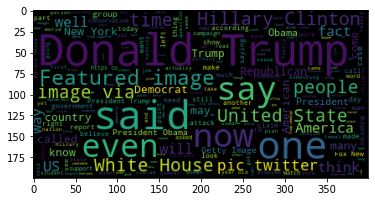

In [ ]:
plt.imshow(wordcloud)

In [ ]:
real=pd.read_csv('drive/MyDrive/True.csv')
real.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
    try:
          record=row.split('-',maxsplit=1)
          record[1]
          assert(len(record[0])<120)
    except:
          unknown_publishers.append(index)


In [ ]:
len(unknown_publishers)

222

In [ ]:
real.drop(8970,axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
real.iloc[unknown_publishers]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [ ]:
publisher=[]
#new column for publcihser infor
tmp_text=[]
for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
      tmp_text.append(row)
      publisher.append('Unknwown')
      continue
  else:
      record=row.split('-',maxsplit=1)
      publisher.append(record[0].strip())
      tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher

In [ ]:
real['text']=tmp_text

In [ ]:
real.shape

(21417, 5)

In [ ]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']

In [ ]:
real['text'].apply(lambda x: str(x).lower())
fake['text'].apply(lambda x: str(x).lower())


0         donald trump sends out embarrassing new year’...
1         drunk bragging trump staffer started russian ...
2         sheriff david clarke becomes an internet joke...
3         trump is so obsessed he even has obama’s name...
4         pope francis just called out donald trump dur...
                               ...                        
23476    mcpain: john mccain furious that iran treated ...
23477    justice? yahoo settles e-mail privacy class-ac...
23478    sunnistan: us and allied ‘safe zone’ plan to t...
23479    how to blow $700 million: al jazeera america f...
23480    10 u.s. navy sailors held by iranian military ...
Name: text, Length: 23481, dtype: object

In [ ]:
real['class']=1
fake['class']=0

In [ ]:
real_n=real[['text','class']]
fake_n=fake[['text','class']]

In [ ]:
data=real_n.append(fake_n,ignore_index=True)

In [ ]:
data.sample(5)

,text,class
11247,Cheesy puns abound as White House hosts online...,1
42451,OBAMA’S CHIEF OF STAFF WARNS AMERICA…He’s Not ...,0
39607,FACTORY WORKER RIPS INTO Speaker Paul Ryan on ...,0
13331,Scientists identify remains of 88 Argentine so...,1
14113,Italian magistrates investigate whether ex-Tre...,1


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

     |████████████████████████████████| 10.4 MB 4.6 MB/s 
     |████████████████████████████████| 2.2 MB 39.3 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!pip install git+https://github.com/aparna18cs/preprocessing_nlp_11.git --upgrade --force-reinstall

  Cloning https://github.com/aparna18cs/preprocessing_nlp_11.git to /tmp/pip-req-build-zul2zjwf
  Running command git clone -q https://github.com/aparna18cs/preprocessing_nlp_11.git /tmp/pip-req-build-zul2zjwf
  Created wheel for preprocess-aparna18cs: filename=preprocess_aparna18cs-0.0.3-py3-none-any.whl size=3832 sha256=45ee1777b03ccc91d88f3d6ca698f8e4a1c908a65b212056c886b90aedc0f249
  Stored in directory: /tmp/pip-ephem-wheel-cache-jldj3tp3/wheels/d8/02/2b/eb158497d4686b1e0f74273ba2d46fdd6279a400d5d063c38a
Successfully built preprocess-aparna18cs


In [ ]:
import preprocess_aparna18cs as ps

In [ ]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [ ]:
import gensim

In [ ]:
y=data['class'].values
x=[]
dd=data['text'].tolist()
for d in dd:
    x.append(d.split())


In [ ]:
type(x)

list

In [ ]:
x[2]

['Senior',
 'US',
 'Republican',
 'senator',
 'Let',
 'Mr',
 'Mueller',
 'do',
 'his',
 'job',
 'The',
 'special',
 'counsel',
 'investigation',
 'of',
 'links',
 'between',
 'Russia',
 'and',
 'President',
 'Trumps',
 '2016',
 'election',
 'campaign',
 'should',
 'continue',
 'without',
 'interference',
 'in',
 '2018',
 'despite',
 'calls',
 'from',
 'some',
 'Trump',
 'administration',
 'allies',
 'and',
 'Republican',
 'lawmakers',
 'to',
 'shut',
 'it',
 'down',
 'a',
 'prominent',
 'Republican',
 'senator',
 'said',
 'on',
 'Sunday',
 'Lindsey',
 'Graham',
 'who',
 'serves',
 'on',
 'the',
 'Senate',
 'armed',
 'forces',
 'and',
 'judiciary',
 'committees',
 'said',
 'Department',
 'of',
 'Justice',
 'Special',
 'Counsel',
 'Robert',
 'Mueller',
 'needs',
 'to',
 'carry',
 'on',
 'with',
 'his',
 'Russia',
 'investigation',
 'without',
 'political',
 'interference',
 'This',
 'investigation',
 'will',
 'go',
 'forward',
 'It',
 'will',
 'be',
 'an',
 'investigation',
 'conducted',

In [ ]:
dim=300 # each word will seq of 100 
w2v_model=gensim.models.Word2Vec(sentences=x,size=dim,window=20,min_count=1)


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
x=tokenizer.texts_to_sequences(x)

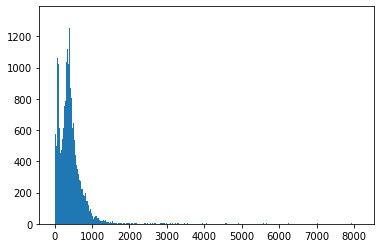

In [ ]:
plt.hist([len(i) for i in x],bins=700)
plt.show()

In [ ]:
maxlen=1000
x=pad_sequences(x,maxlen)

In [ ]:
vocab_size =len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:

def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size,300))
  for word, i in vocab.items():
    try: weight_matrix[i] = model.wv[word]
    except: print(word, 'not found')
  return weight_matrix


In [ ]:
embedding_vectors=get_weight_matrix(w2v_model)
embedding_vectors.shape

Streaming output truncated to the last 5000 lines.
securitysuch not found
drunkgolden not found
facultythat not found
nationsnow not found
thisis not found
iguina not found
organizationsobama not found
kremlinrussia not found
armyrussia not found
westterrorists not found
kingdombarack not found
groupvia not found
punditisrael not found
globethey not found
fridaytodenhofer not found
videosaccording not found
americanslaura not found
lasuzy not found
godbless not found
hudsection not found
freebiesthousands not found
norwalkofficials not found
censushousing not found
fundssource not found
yearsus not found
2017aides not found
syrianthe not found
americakerry not found
warkerry not found
senateus not found
accordby not found
chamberdespite not found
julywith not found
enactedthe not found
dealstephen not found
resolutionfour not found
timesangry not found
republicanvia not found
intoann not found
senatecorcoran not found
writeshas not found
decadessure not found
youhistory not found
histo

(231912, 300)

In [ ]:
len(w2v_model.wv.vocab)

266247

In [ ]:
w2v_model.wv.vocab

{'As': <gensim.models.keyedvectors.Vocab at 0x7f61f172b210>,
 'US': <gensim.models.keyedvectors.Vocab at 0x7f61f172b250>,
 'budget': <gensim.models.keyedvectors.Vocab at 0x7f61f172b290>,
 'fight': <gensim.models.keyedvectors.Vocab at 0x7f61f172b2d0>,
 'looms': <gensim.models.keyedvectors.Vocab at 0x7f61f172b350>,
 'Republicans': <gensim.models.keyedvectors.Vocab at 0x7f61f172b3d0>,
 'flip': <gensim.models.keyedvectors.Vocab at 0x7f61f172b410>,
 'their': <gensim.models.keyedvectors.Vocab at 0x7f61f172b450>,
 'fiscal': <gensim.models.keyedvectors.Vocab at 0x7f61f172b310>,
 'script': <gensim.models.keyedvectors.Vocab at 0x7f61f172b390>,
 'The': <gensim.models.keyedvectors.Vocab at 0x7f61f172b490>,
 'head': <gensim.models.keyedvectors.Vocab at 0x7f61f172b4d0>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f61f172b510>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f61f172b550>,
 'conservative': <gensim.models.keyedvectors.Vocab at 0x7f61f172b590>,
 'Republican': <gensim.models.keyedvector

In [ ]:
embedding_vectors.shape

(231912, 300)

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=,weights=[embedding_vectors],input_length=maxlen,trainable=False))
x=x/255.0

SyntaxError: ignored

In [ ]:
from keras.layers.pooling import GlobalMaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer

model=Sequential()
model.add(Embedding(vocab_size,output_dim=300,weights=[embedding_vectors],input_length=maxlen,trainable=False))
#model.add(Bidirectional(LSTM(128,return_sequences=True),input_shape=(1000,1)))
model.add(Bidirectional(LSTM(128,return_sequences=True),input_shape=(1000,10)))
cv=CountVectorizer(lowercase=False)

#model.add(MaxPooling1D(5))
#model.add(Reshape(1000,300))
#model.add(Bidirectional(LSTM(128,return_sequences=True),input_shape=(1000,1)))

model.add(GlobalMaxPooling1D())


#model.add(Flatten())
#model.add(Dropout(0.25))

model.add(Dense(128,activation='sigmoid'))
#model.add(Dropout(0.25))
#model.add(Dense(64,activation="sigmoid"))
#model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 1000, 300)         69573600  
                                                                 
 bidirectional_19 (Bidirecti  (None, 1000, 256)        439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_11 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 70,045,921
Trainable params: 472,321
No

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y)

In [ ]:
model.fit(x_train,y_train,validation_split=0.3,epochs=1)













737/737 [==============================] - 2735s 4s/step - loss: 0.0373 - acc: 0.9871 - val_loss: 0.0173 - val_acc: 0.9943


In [ ]:
y_pred=(model.predict(x_test)>=0.5).astype(int)


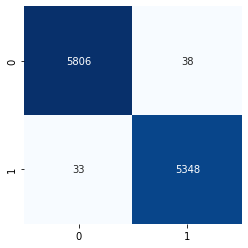

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(matrix_confusion,square=True,annot=True,cmap='Blues',fmt='d',cbar=False)

In [ ]:
#model.predict(t)
accuracy_score(y_test,y_pred)

0.9936748329621381

In [ ]:
!mkdir -p saved_model
model.save('drive/MyDrive/fakenews') 

NameError: ignored

In [ ]:
newmodels =  tf.keras.models.load_model('drive/MyDrive/fakenews') 

# Check its architecture
newmodels.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 1000, 300)         69573600  
                                                                 
 bidirectional_19 (Bidirecti  (None, 1000, 256)        439296    
 onal)                                                           
                                                                 
 global_max_pooling1d_11 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 70,045,921
Trainable params: 472,321
No

In [ ]:
newmodels.predict(t)

array([[0.01169118]], dtype=float32)

In [ ]:
#import tensorflow as tf
tf.keras.models.save_model(newmodels,'drive/MyDrive/fakenews.h5')

In [ ]:

from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = "Natural language processing (NLP) is a field "
  
print(sent_tokenize(text))
print(word_tokenize(text))

['Natural language processing (NLP) is a field']
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field']


In [ ]:
text = "Natural language processing (NLP) is a field " + \
       "of computer science, artificial intelligence " + \
       "and computational linguistics concerned with " + \
       "the interactions between computers and human " + \
       "(natural) languages, and, in particular, " + \
       "concerned with programming computers to " + \
       "fruitfully process large natural language " + \
       "corpora. Challenges in natural language " + \
       "processing frequently involve natural " + \
       "language understanding, natural language" + \
       "generation frequently from formal, machine" + \
       "-readable logical forms), connecting language " + \
       "and machine perception, managing human-" + \
       "computer dialog systems, or some combination " + \
       "thereof."
  
print(sent_tokenize(text))
words=word_tokenize(text)

['Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.', 'Challenges in natural language processing frequently involve natural language understanding, natural languagegeneration frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.']


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
words=[w for w in words if not  w in stop]
words

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'field',
 'computer',
 'science',
 ',',
 'artificial',
 'intelligence',
 'computational',
 'linguistics',
 'concerned',
 'interactions',
 'computers',
 'human',
 '(',
 'natural',
 ')',
 'languages',
 ',',
 ',',
 'particular',
 ',',
 'concerned',
 'programming',
 'computers',
 'fruitfully',
 'process',
 'large',
 'natural',
 'language',
 'corpora',
 '.',
 'Challenges',
 'natural',
 'language',
 'processing',
 'frequently',
 'involve',
 'natural',
 'language',
 'understanding',
 ',',
 'natural',
 'languagegeneration',
 'frequently',
 'formal',
 ',',
 'machine-readable',
 'logical',
 'forms',
 ')',
 ',',
 'connecting',
 'language',
 'machine',
 'perception',
 ',',
 'managing',
 'human-computer',
 'dialog',
 'systems',
 ',',
 'combination',
 'thereof',
 '.']

In [ ]:
import string
punctutation = string.punctuation 
print(punctutation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
stop=stop+list(string.punctuation)

In [ ]:
words=[w for w in words if not  w in stop]
words

['Natural',
 'language',
 'processing',
 'NLP',
 'field',
 'computer',
 'science',
 'artificial',
 'intelligence',
 'computational',
 'linguistics',
 'concerned',
 'interactions',
 'computers',
 'human',
 'natural',
 'languages',
 'particular',
 'concerned',
 'programming',
 'computers',
 'fruitfully',
 'process',
 'large',
 'natural',
 'language',
 'corpora',
 'Challenges',
 'natural',
 'language',
 'processing',
 'frequently',
 'involve',
 'natural',
 'language',
 'understanding',
 'natural',
 'languagegeneration',
 'frequently',
 'formal',
 'machine-readable',
 'logical',
 'forms',
 'connecting',
 'language',
 'machine',
 'perception',
 'managing',
 'human-computer',
 'dialog',
 'systems',
 'combination',
 'thereof']

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["happy", "happier", "read", "reading", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

happy  :  happi
happier  :  happier
read  :  read
reading  :  read
programmers  :  programm


In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(words)
  
print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('happy', 'JJ'), ('happier', 'JJR'), ('read', 'JJ'), ('reading', 'NN'), ('programmers', 'NNS')]
